# A basic crib sheet for setting up a folium map

The first part of this example shows how to 
    a) add point data to a GeoDataFrame
    

In [63]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium import plugins

import branca
import branca.colormap as cm

In [23]:
############################################# Set Up of Functions and Paths ################################################

### Paths to data

path_to_main = r"C:\MyWork\Leaflet for Git"

### Create Functions to make analyses easier later on
# Function to centre point of point distribution

def get_centroid_XY(data):
    #X = []
    #Y = []
    #for l in L :
    #    X.append(data.centroid.x)
    #    Y.append(data.centroid.y)
    X = data.centroid.x
    Y = data.centroid.y

    res = pd.DataFrame(data = {'X': [sum(X)/len(X)] , 'Y': [sum(Y)/len(Y)]})
    return res

## Add raw data and prepare for mapping

In [10]:
lr_df = pd.read_csv(f"{path_to_main}\LandRegSample.csv")
lr_df.head() # Check load worked okay

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,Add4,Add5,Add6,Add7,Easting,Northing
0,{C18F412B-42F8-81A6-E053-6B04A8C0AD18},390000.0,2020-07-16,SW20 9BU,F,N,L,267,FLAT 2,MARTIN WAY,NaN,LONDON,MERTON,GREATER LONDON,524220,168827
1,{A96E4ACC-9B1B-9205-E053-6C04A8C0DA09},310000.0,2020-04-24,SW19 1DS,F,N,L,35,NaN,WOBURN CLOSE,NaN,LONDON,MERTON,GREATER LONDON,526260,170514
2,{A96E4ACC-904B-9205-E053-6C04A8C0DA09},599250.0,2020-03-17,SW19 2ND,T,N,F,29,NaN,MEADOW ROAD,NaN,LONDON,MERTON,GREATER LONDON,526313,170026
3,{A96E4ACC-96F3-9205-E053-6C04A8C0DA09},390000.0,2020-04-02,SM4 6PS,T,N,F,49,NaN,FURNESS ROAD,NaN,MORDEN,MERTON,GREATER LONDON,525876,167086
4,{A96E4ACC-7AB4-9205-E053-6C04A8C0DA09},325000.0,2020-04-06,SW19 1SY,F,N,L,22,FLAT 4,MONTAGUE ROAD,NaN,LONDON,MERTON,GREATER LONDON,525579,170191


<AxesSubplot:>

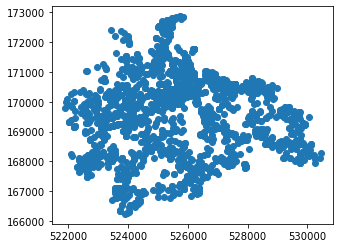

In [11]:
lr_gdf = gpd.GeoDataFrame(lr_df, geometry = gpd.points_from_xy(lr_df.Easting, lr_df.Northing)).set_crs("EPSG:27700")
lr_gdf.plot() # Check data looks okay

In [105]:
lrWGS_gdf = lr_gdf.to_crs(crs="EPSG:4326")
lrWGS_gdf.head()

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,Add4,Add5,Add6,Add7,Easting,Northing,geometry
0,{C18F412B-42F8-81A6-E053-6B04A8C0AD18},390000.0,2020-07-16,SW20 9BU,F,N,L,267,FLAT 2,MARTIN WAY,NaN,LONDON,MERTON,GREATER LONDON,524220,168827,POINT (-0.21548 51.40488)
1,{A96E4ACC-9B1B-9205-E053-6C04A8C0DA09},310000.0,2020-04-24,SW19 1DS,F,N,L,35,NaN,WOBURN CLOSE,NaN,LONDON,MERTON,GREATER LONDON,526260,170514,POINT (-0.18557 51.41959)
2,{A96E4ACC-904B-9205-E053-6C04A8C0DA09},599250.0,2020-03-17,SW19 2ND,T,N,F,29,NaN,MEADOW ROAD,NaN,LONDON,MERTON,GREATER LONDON,526313,170026,POINT (-0.18498 51.41519)
3,{A96E4ACC-96F3-9205-E053-6C04A8C0DA09},390000.0,2020-04-02,SM4 6PS,T,N,F,49,NaN,FURNESS ROAD,NaN,MORDEN,MERTON,GREATER LONDON,525876,167086,POINT (-0.19230 51.38886)
4,{A96E4ACC-7AB4-9205-E053-6C04A8C0DA09},325000.0,2020-04-06,SW19 1SY,F,N,L,22,FLAT 4,MONTAGUE ROAD,NaN,LONDON,MERTON,GREATER LONDON,525579,170191,POINT (-0.19547 51.41683)


In [40]:
###Get centroid of point distribution to set map centre

cent = get_centroid_XY(lrWGS_gdf)

C:\Users\culleyj\AppData\Local\Temp/ipykernel_58100/3551290434.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  X = data.centroid.x
C:\Users\culleyj\AppData\Local\Temp/ipykernel_58100/3551290434.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Y = data.centroid.y


In [107]:
################################################# FOLIUM BASIC SET UP ####################################################

# to initiate a map, you just need to enter values for longitude and latitude and how close / far out you want to be
basic_m = folium.Map(location=(cent.iloc[0,1], cent.iloc[0,0], ), zoom_start=12, tiles = 'cartodbpositron')

# you can add a fullscreen button, if you want
#plugins.Fullscreen(position='topright',title='Expand me',title_cancel='Exit me',force_separate_button=True).add_to(m)

# you can add a minimap
#minimap = plugins.MiniMap()
#m.add_child(minimap)

basic_m

In [106]:
################################################# Basic Map of Sales ####################################################

#For Colour Map find max and min prices
min_SP = lrWGS_gdf.SalePrice.min()
max_SP = lrWGS_gdf.SalePrice.max()

#Set up colour map so values can be seen across the area
colormap = cm.LinearColormap(colors=['darkblue', 'blue','lightblue', 'cyan', 'lightyellow','yellow', 'orange', 'red'],
                             index=[min_SP,500000,750000,1000000,1250000,2000000,5000000,max_SP], vmin=min_SP, vmax=max_SP,
                             caption='Sale Price')

#Create a list of geometeries for the points
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in lrWGS_gdf.geometry ]

#Initiate Map using centroid as centre point
point_m = folium.Map(location=(cent.iloc[0,1], cent.iloc[0,0], ), zoom_start=12, tiles = 'cartodbpositron')

#Add points to map and colour by value
i = 0
for coordinates in geo_df_list:
    
    folium.CircleMarker(
        location=coordinates,
        radius=4,
        fill=True,
        color=colormap(lrWGS_gdf.SalePrice[i]),
        fill_color=colormap(lrWGS_gdf.SalePrice[i])
    ).add_to(point_m)


    i =i + 1

point_m.add_child(colormap)

point_m